Predicción de gastos médicos
===

* *45 min* | Ultima modificación: Junio 22, 2019

En este tutorial se construye un modelo de regresión lineal para la predicción de gastos médicos por parte de una aseguradora.

## Descripción del problema

Una compañía de seguros desea pronósticar los gastos médicos de la población asegurada con el fin de recolectar un valor superior en ingresos, tal que le permita obtener utilidades. Los costos son difíciles de pronósticar ya que las condiciones más costosas son más raras y parecen aleatorias; y que ciertas condiciones son más probables para ciertos segmentos de la población (infarto en personas obesas y cáncer en fumadores).

El objetivo es usar una base de datos con 1338 registros de gastos médicos hipotéticos para pacientes de EU con el fin de estimar los costos para determinados segmentos de la población. La información registrada es la siguiente:

* Age: entero hasta 64.

* Sex: male, female.

* bmi: Body mass index.

* children: entero indicando la cantidad de hijos/dependientes cubiertos por el plan de salud.

* smoker: yes, no.

* region: northest, southeast, southwest, northwest.

* charges: costos.


## Preparación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
%load_ext rpy2.ipython

## Lectura de datos

In [2]:
##
## Lectura del archivo y verificación
##
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/insurance.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
##
## Tipos de las columnas.
##
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Análisis exploratorio

In [4]:
##
## Estadísticos descriptivos de las variables
##
## Información estadística de la variable dependiente.
## Se busca cualquier indicio de irregularidades, 
## especialmente datos atípicos, información faltante, etc.
##
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


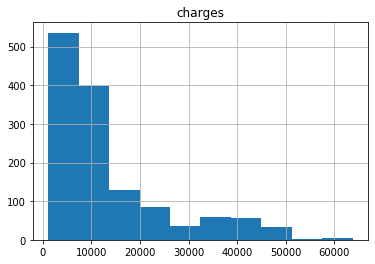

In [5]:
##
## histograma.
## Muestra que la mayor parte de la población tiene 
## gastos bajos, mientras que disminuye la frecuencia
## de costos más altos es más baja.
##
df.hist(column='charges');

In [6]:
##
## Se evalua la cantidad de casos por región.
## Todas las regiones tienen aproximadamente
## la misma cantidad de casos.
##
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [7]:
##
## El análisis de correlación muestra que 
## existe una mayor correlación de los gastos
## con la edad y el bmi, pero no con la 
## cantidad de dependientes.
##
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


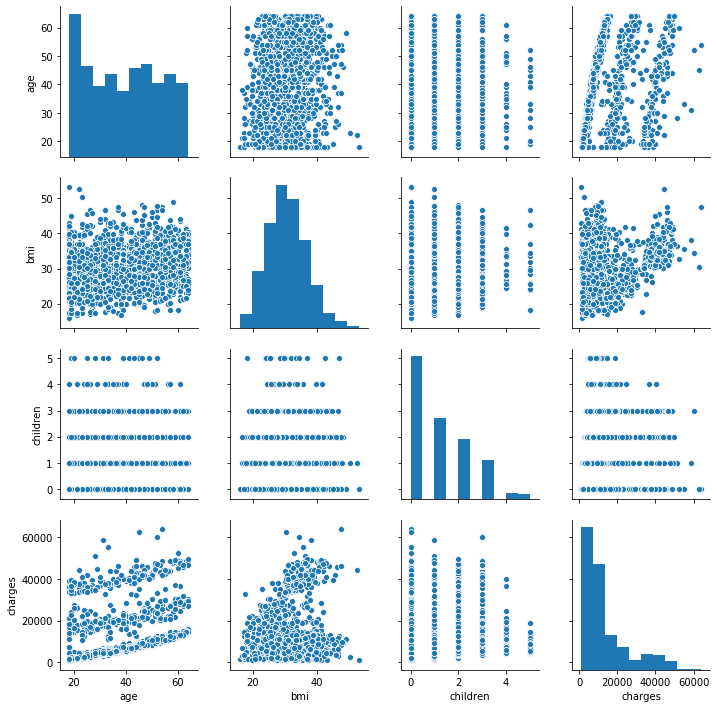

In [8]:
##
## Se construye la siguiente gráfica para
## visualizar relaciones entre las variables
##
import seaborn as sns
sns.pairplot(df);

##
## la gráfica muestra una relación entre age y charges, 
## y dos grupos para bmi y charges.
##

## Entrenamiento del modelo

In [9]:
##
## Las columnas sex, smoker, region son strings.
## Se convierten a variables categoricas
##
from sklearn import preprocessing

##
## Entrena los codificadores
##
encoder_sex = preprocessing.LabelEncoder().fit(df.sex)
encoder_smoker = preprocessing.LabelEncoder().fit(df.smoker)
encoder_region = preprocessing.LabelEncoder().fit(df.region)

##
## Genera las variables transformadas
##
df['sex_factor'] = encoder_sex.transform(df.sex)
df['smoker_factor'] = encoder_smoker.transform(df.smoker)
df['region_factor'] = encoder_region.transform(df.region)

In [10]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
sex_factor         int64
smoker_factor      int64
region_factor      int64
dtype: object

## Pronóstico con sklearn

In [11]:
##
## Se usa la función LinearRegresion() para 
## estimar el modelo de regresión lineal.
##
from sklearn import linear_model

## Crea el modelo
regr = linear_model.LinearRegression()

## Obtiene las variables independientes
x = df[['age', 'bmi', 'children', 'sex_factor', 'smoker_factor', 'region_factor']]

## Obtiene la variable dependientes
y = df[['charges']]

## Calibra el modelo
regr.fit(x, y)

## Imprime los coeficientes:
print('Coeficientes: ', regr.coef_)

## Imprime el intercepto:
print('\nIntercepto: ', regr.intercept_)

Coeficientes:  [[  257.28807486   332.57013224   479.36939355  -131.11057962
  23820.43412267  -353.64001656]]

Intercepto:  [-11815.45232123]


In [12]:
## 
## Pronostico para los datos de calibración
##
y_pred = regr.predict(x)
y_pred

array([[25111.24186363],
       [ 3687.60517284],
       [ 6963.14570669],
       ...,
       [ 4363.66236622],
       [ 1106.98661296],
       [37013.72809551]])

In [13]:
##
## Métricas de error
##
from sklearn.metrics import mean_squared_error, r2_score

## MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))

## R2
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 36527659.89
Variance score: 0.75


## Pronóstico con statmodels

In [14]:
##
## Regresión usando statsmodels con formulas como en R
##
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Ajusta el modelo
mod = smf.ols(formula='charges ~ age + bmi + children + sex_factor + smoker_factor + region_factor', 
              data=df)
res = mod.fit()
print(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:15:37   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age             257.2881     11.886     21.647      0.000     233.971     280.605
bmi             332.5701     27.722     11.997      0.000     278.186     386.954
children        479.3694    137.644      3.483      0.001     209.346     749.393
sex_factor     -131.1106    332.811     -0.394      0.694    -784.001     521.780
smoker_factor  2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region_factor  -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
##
## Parámetros del modelo
##
res.params

Intercept       -11815.452321
age                257.288075
bmi                332.570132
children           479.369394
sex_factor        -131.110580
smoker_factor    23820.434123
region_factor     -353.640017
dtype: float64

In [16]:
##
## Predicción
##
res.predict(df).head()

0    25111.241864
1     3687.605173
2     6963.145707
3     3741.308405
4     5537.640897
dtype: float64

## Opcional --- Lenguaje R

In [17]:
%%R
##
## Carga y verificación de los datos.
## La variable charges es la que se desea pronósticar.
##
df <- read.csv("insurance.csv", stringsAsFactors = TRUE)

##
## Se verifica que los datos hayan sido leidos correctamente.
## Se varifican los valores de las variables buscando cualquier
## problema de lectura.
##
str(df)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [18]:
%%R
##
## Información estadística de la variable dependiente.
## Se busca cualquier indicio de irregularidades, 
## especialmente datos atípicos, información faltante, etc.
##
summary(df$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 


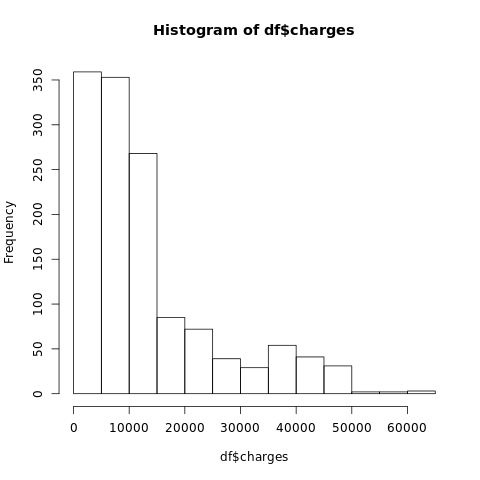

In [19]:
%%R
##
## histograma.
## Muestra que la mayor parte de la población tiene 
## gastos bajos, mientras que disminuye la frecuencia
## de costos más altos es más baja.
##
hist(df$charges)

In [20]:
%%R
##
## Se evalua la cantidad de casos por región.
## Todas las regiones tienen aproximadamente
## la misma cantidad de casos.
##
table(df$region)


northeast northwest southeast southwest 
      324       325       364       325 


In [21]:
%%R
##
## El análisis de correlación muestra que 
## existe una mayor correlación de los gastos
## con la edad y el bmi, pero no con la 
## cantidad de dependientes.
##
cor(df[c("age", "bmi", "children", "charges")])

               age       bmi   children    charges
age      1.0000000 0.1092719 0.04246900 0.29900819
bmi      0.1092719 1.0000000 0.01275890 0.19834097
children 0.0424690 0.0127589 1.00000000 0.06799823
charges  0.2990082 0.1983410 0.06799823 1.00000000


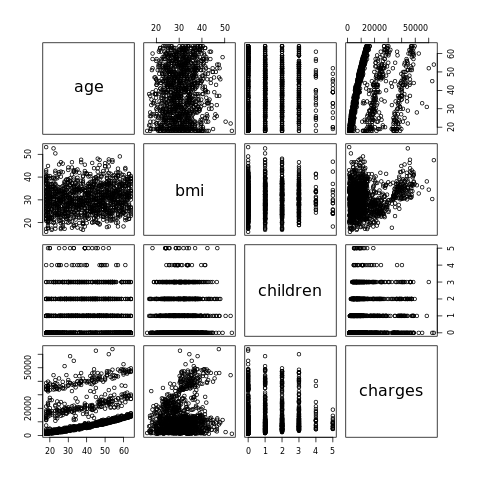

In [22]:
%%R
##
## Se construye la siguiente gráfica para
## visualizar relaciones entre las variables
##
pairs(df[c("age", "bmi", "children", "charges")])

##
## la gráfica muestra una relación entre age y charges, 
## y dos grupos para bmi y charges.
##

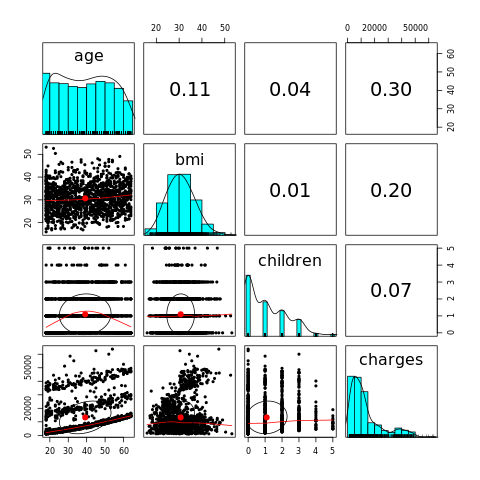

In [23]:
%%R
##
## Una gráfica más informativa se obtiene de con la 
## función pairs.panels().
##
# install.packages("psych")
##
library(psych)
pairs.panels(df[c("age", "bmi", "children", "charges")])

**Actividad.---** Cómo se interpreta la gráfica anterior?

### Entrenamiento del modelo

In [24]:
%%R
##
## Se usa la función lm para estimar el modelo de
## regresión lineal.
##
m <- lm(charges ~ age + children + bmi + sex + smoker + region, 
                data = df)

##
## Se imprimen los parámetros del modelo
##
m


Call:
lm(formula = charges ~ age + children + bmi + sex + smoker + 
    region, data = df)

Coefficients:
    (Intercept)              age         children              bmi  
       -11938.5            256.9            475.5            339.2  
        sexmale        smokeryes  regionnorthwest  regionsoutheast  
         -131.3          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  



In [25]:
%%R
##
## Ya que el modelo usa todas las variables 
## explicativas disponibles, la llamada a la
## función puede simplificarse como:
##
m <- lm(charges ~ ., data = df)
m


Call:
lm(formula = charges ~ ., data = df)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11938.5            256.9           -131.3            339.2  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.5          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  



**Actividad.---** En la tabla de datos no existen las variables sexmale y smokeryes, cómo se obtuvieron?

### Diagnóstico del modelo

#### Coeficientes del modelo

In [26]:
%%R
## 
## Se imprime un resumen del modelo estimado.
## El primer paso consiste en eliminar las variables 
## irrelevantes. En este caso, se eliminaría la variable
## `sexmale` (valor más alto de Pr(>|t|)) y se estimaría
## el modelo nuevamente. Se eliminaría la siguiente variable
## más irrelevante y así sucesivamente hasta que solo queden
## variables relevantes en el modelo
##
summary(m)


Call:
lm(formula = charges ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16



#### Análisis de residuales

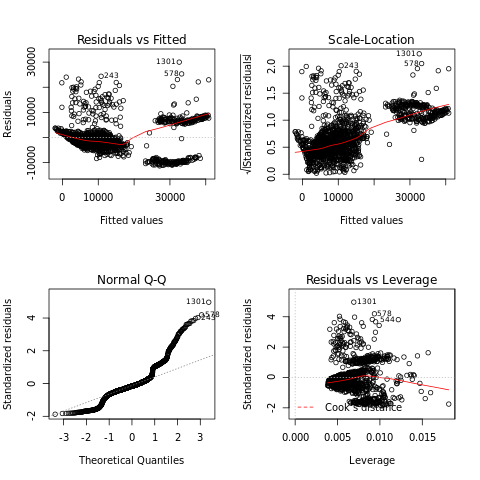

In [27]:
%%R
##
## Se construye una gráfica de 2x2
##
layout(matrix(c(1,2,3,4),2,2))

##
## Se realizan los gráficos de 
## dignóstico del modelo.
##
plot(m)

##
## El gráfico QQ muesta que el modelo
## no captura adecuadamente el comportamiento
## Los demás grafos corroboran esto.
##

### Mejora del modelo

En un modelo lineal es posible considerar relaciones no lineales por medio de la transformación de las variables. En el siguiente caso se agrega la edad al cuadrado al dataframe.

In [28]:
%%R
df$age2 <- df$age^2

Adicionalmente, se considera que la variable bmi podría ser reemplazada simplemente por una variable indicadora que toma el valor de 1 si el bmi es igual o mayor a 30, y cero en caso contrario. 

In [29]:
%%R
df$bmi30 <- ifelse(df$bmi >= 30, 1, 0)

Más aún, es posible considerar la interacción de dos o más variables. En el siguiente caso, se considera la interación de smoker y bmi30. La notación var1:var2 es equivalente a var1 + var2 + var1*var2. 

In [30]:
%%R
##
## El siguiente model considera simultáneamente 
## el efecto no lineal de la edad, si la persona es 
## obesa y la interacción entre obesidad y que la persona
## sea fumadora.
##
m2 <- lm(charges ~ age + age2 + children + bmi + sex + bmi30*smoker + region, 
                 data = df)
summary(m2)


Call:
lm(formula = charges ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17296.4  -1656.0  -1263.3   -722.1  24160.2 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       134.2509  1362.7511   0.099 0.921539    
age               -32.6851    59.8242  -0.546 0.584915    
age2                3.7316     0.7463   5.000 6.50e-07 ***
children          678.5612   105.8831   6.409 2.04e-10 ***
bmi               120.0196    34.2660   3.503 0.000476 ***
sexmale          -496.8245   244.3659  -2.033 0.042240 *  
bmi30           -1000.1403   422.8402  -2.365 0.018159 *  
smokeryes       13404.6866   439.9491  30.469  < 2e-16 ***
regionnorthwest  -279.2038   349.2746  -0.799 0.424212    
regionsoutheast  -828.5467   351.6352  -2.356 0.018604 *  
regionsouthwest -1222.6437   350.5285  -3.488 0.000503 ***
bmi30:smokeryes 19810.7533   604.6567  32.764  < 2e-16 ***
---
Sig

Nóte que este modelo tiene un r2 superior al del modelo original.

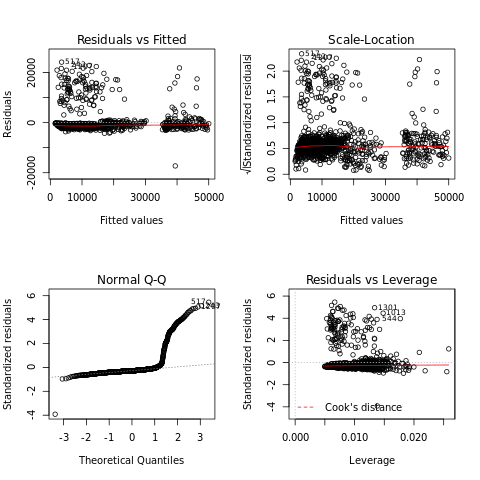

In [31]:
%%R
##
## Los gráficos de diagnóstico mejoran mucho
## pero aún el modelo podría mejorarse aún más
## usando otras técnicas.
##
layout(matrix(c(1,2,3,4),2,2))
plot(m2)

**Actividad.---** Elimine las variables no significativas.

**Actividad.---** Realice este ejercicio realizando ridge regression.

**Actividad.---** Realice este ejercicio usando LASSO. 